In [1]:
from shapely.geometry import Point, GeometryCollection, MultiPolygon, Polygon
from model.RegionsCalcs import create_regions, create_base_region_for_bs
from model.RegionsPlotter import standard_plot
import numpy as np
from model.NetworkGraph import CompleteGraph
from model.NodeClass import Node
from model.LinkClass import Link
from model.NetworkGraphPlots import NodeDegreeHeatMapPlot
from numpy import random

In [2]:
# Import the network
graph = CompleteGraph.of_sources("../Passion_Xtreme_III.mat", "../NameTypes.xlsx")

Discarded nodes: 39
Discarded links: 0
Links: 174
Nodes: 154

*-*-* Printing information about the imported network *-*-*

Num nodes: 154
Num links: 174
Num HL4: 20
Num HL5: 134
Average distance: 2.58
Max distance (km): 22.00
Min distance (km): 0.18
Average degree: 2.27
Min degree: 1
Max degree: 10
Average degree HL4: 1.95
Average degree HL5: 2.32
Total bidirectional link length (km): 448.84


In [3]:
# Common scenario for both cases
# Params
scaling_factor = 1  # No scaling
p_tx_macro = 40     # W
p_tx_fem = 10       # W
alpha_loss = 4      # dB
def_max_rad = 1     # km
prob_fem = 1


cells = []
cells_max_radius = []
assocciated_nodes = []
for node in graph.nodes:
    if node.type == "HL5":
        assocciated_nodes.append(node)


assocciated_nodes = sorted(assocciated_nodes, key=lambda x: x.type == "HL4", reverse=True)
for node in assocciated_nodes:
    if node.type == "HL4":
        cells.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_macro))
    else:
        cells.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_fem))
        cells_max_radius.append(def_max_rad)


base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]
print(base_area)

[(0.0, 0.0), (0.0, 98.53143101823554), (95.58191009784183, 98.53143101823554), (95.58191009784183, 0.0), (0.0, 0.0)]


In [4]:
regions = []

for cell in cells:
    regions.append(create_base_region_for_bs(cell[:2], cell[2], alpha_loss, def_max_rad, scaling_factor))


In [5]:
regions

[<POLYGON ((29.384 96.531, 29.379 96.433, 29.365 96.336, 29.341 96.241, 29.30...>,
 <POLYGON ((46.976 48.744, 46.971 48.646, 46.957 48.549, 46.933 48.454, 46.9 ...>,
 <POLYGON ((71.412 39.012, 71.408 38.913, 71.393 38.816, 71.369 38.721, 71.33...>,
 <POLYGON ((32.936 27.232, 32.931 27.134, 32.917 27.037, 32.893 26.941, 32.86...>,
 <POLYGON ((64.238 46.002, 64.233 45.904, 64.218 45.807, 64.194 45.712, 64.16...>,
 <POLYGON ((41.905 36.116, 41.9 36.018, 41.886 35.921, 41.862 35.825, 41.829 ...>,
 <POLYGON ((64.823 63.459, 64.819 63.361, 64.804 63.264, 64.78 63.169, 64.747...>,
 <POLYGON ((50.119 26.102, 50.114 26.004, 50.1 25.907, 50.076 25.812, 50.043 ...>,
 <POLYGON ((73.381 61.242, 73.377 61.144, 73.362 61.047, 73.338 60.952, 73.30...>,
 <POLYGON ((68.778 51.433, 68.774 51.335, 68.759 51.238, 68.735 51.142, 68.70...>,
 <POLYGON ((80.488 62.446, 80.484 62.348, 80.469 62.251, 80.445 62.156, 80.41...>,
 <POLYGON ((26.012 17.485, 26.007 17.387, 25.993 17.29, 25.969 17.195, 25.936...>,
 <PO

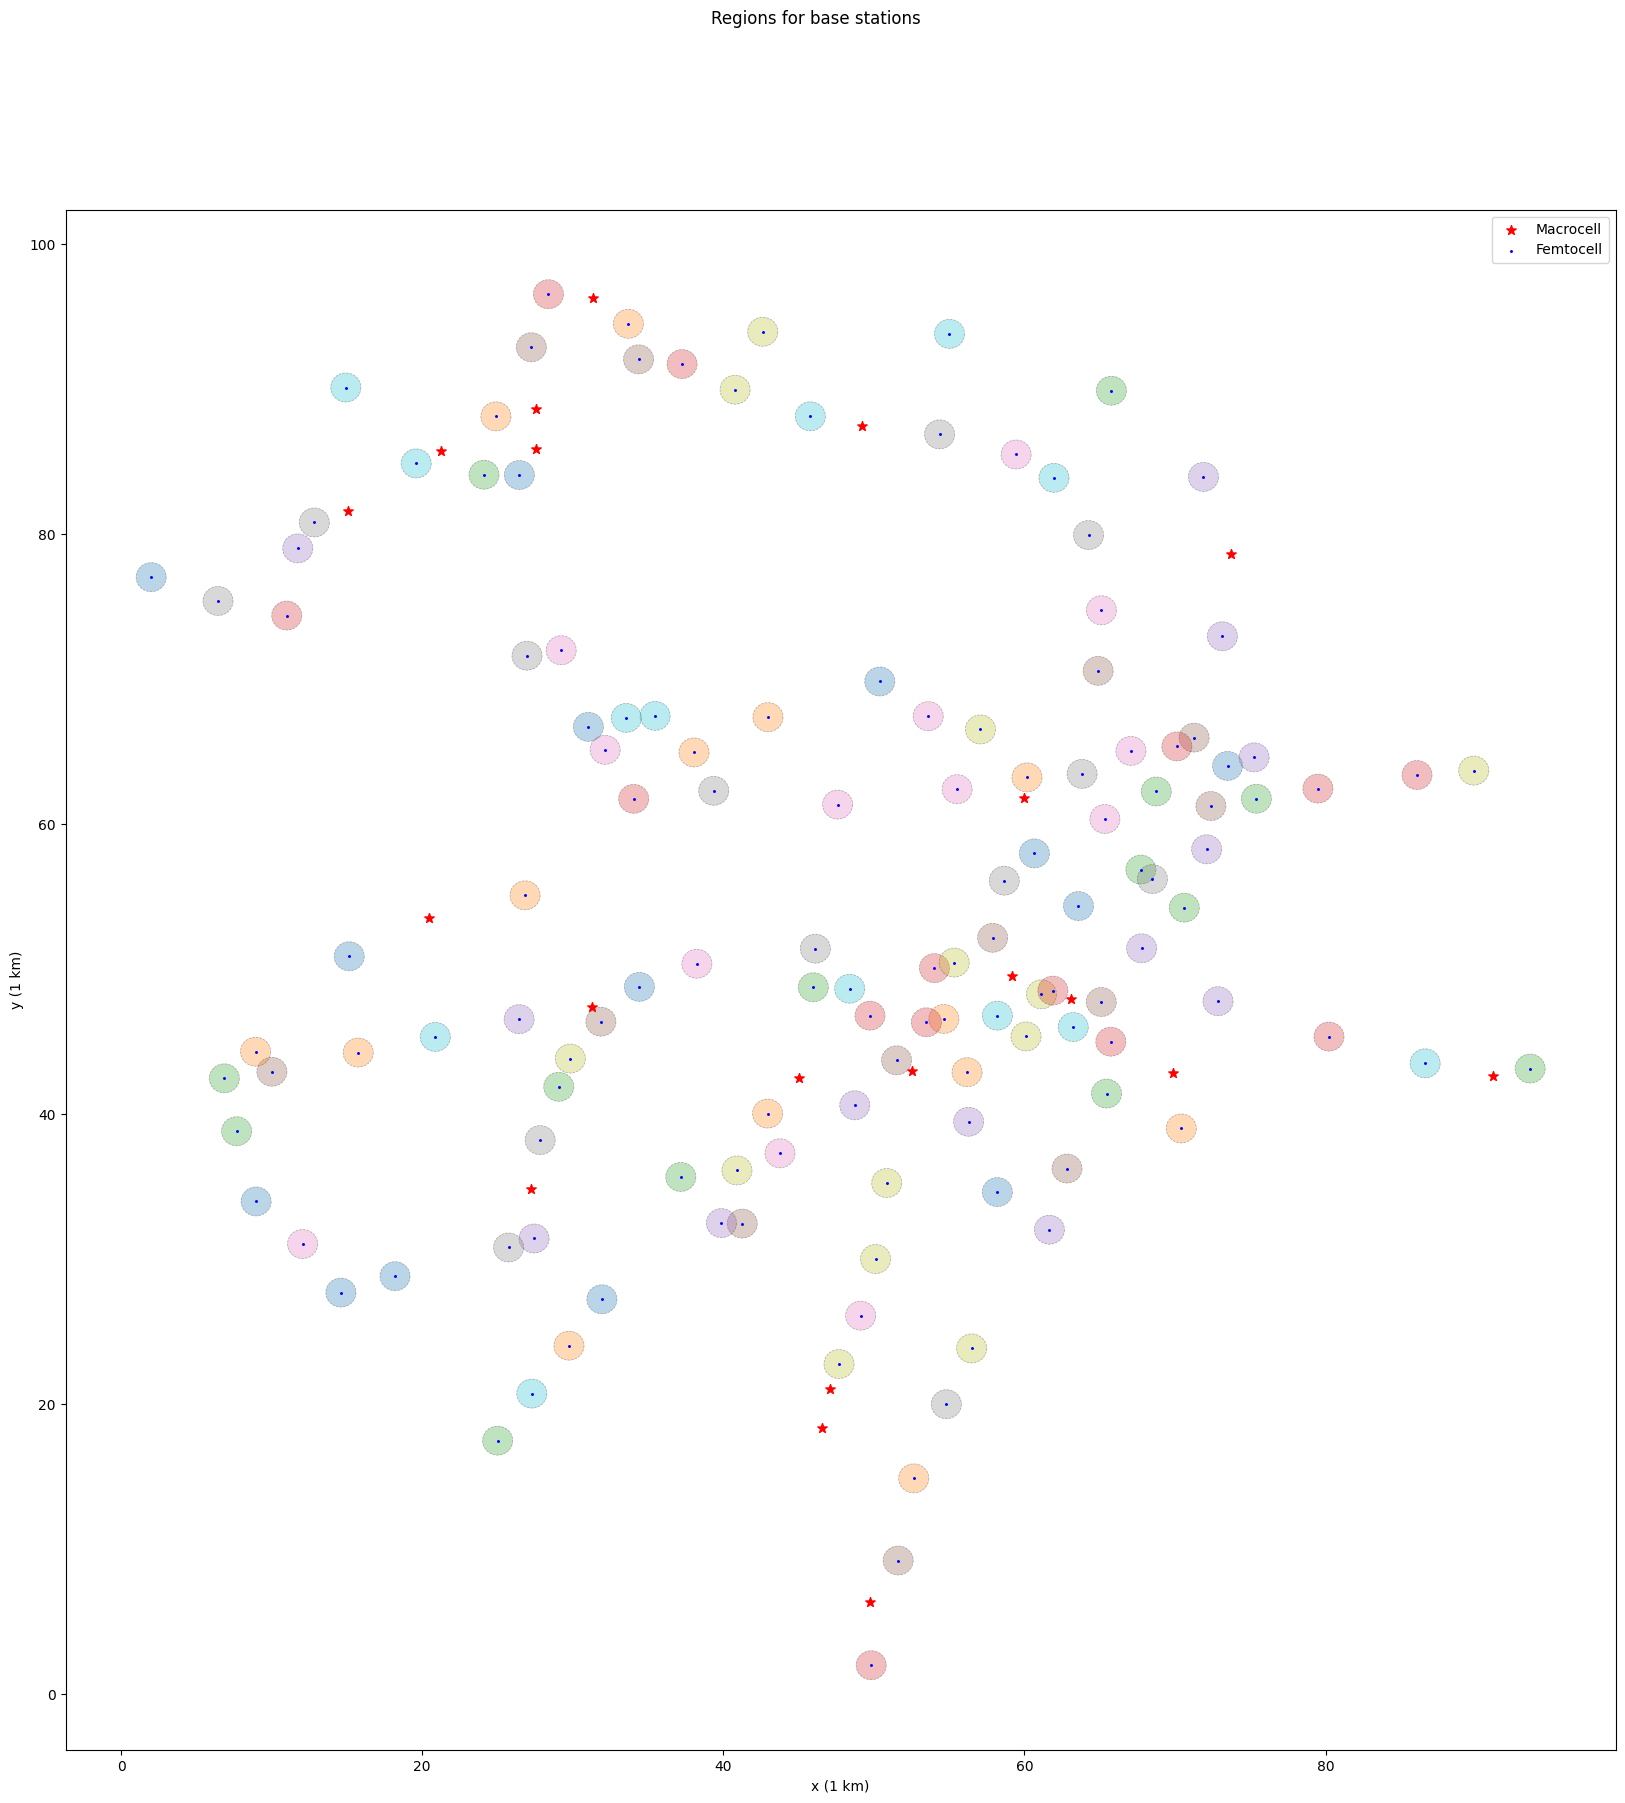

In [6]:
standard_plot(
    regions, 
    graph.nodes, 
    1, 
    femtocell_config={"marker": ".", "s": 5},
    plot_config={"title": "Regions for base stations", "figsize": (20, 20)},
)